### Calling required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Checking the data for Null values

In [3]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

### Checking the dimension of the data and getting a brief review of the data

In [4]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [5]:
retain = df[df.left == 0]
retain.shape

(11428, 10)

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can conclude that:

**Satisfaction Level**: The satisfaction level is relatively low (0.44) in employees leaving their job compared to employees who stayed at the company (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving their job. (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to decide to keep their job

### Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

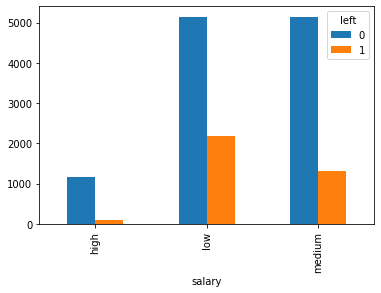

In [8]:
pd.crosstab(df.salary , df.left).plot(kind = 'bar')

Above bar chart shows employees with high salaries are more likely to stay at the company

### Employee preservation rate based on department type

<AxesSubplot:xlabel='Department'>

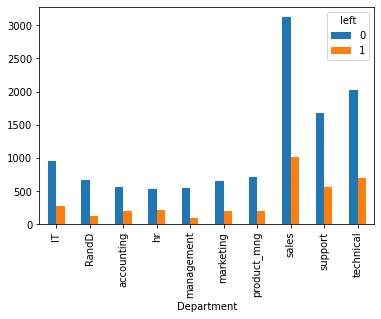

In [9]:
pd.crosstab(df.Department , df.left).plot(kind = 'bar')

From the above chart, there seems to be some impact of the type of department on employee preservation rate but it is not major. Therefore, we will ignore department in our analysis.

### Leaving the company  V.S. Evaluation

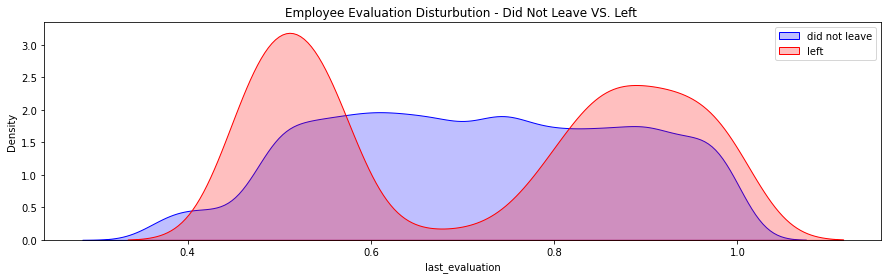

In [10]:
fig = plt.figure(figsize = (15, 4),)
ax = sns.kdeplot(df.loc[(df['left'] == 0), 'last_evaluation'], color = 'b', shade =True, label = 'did not leave')
ax = sns.kdeplot(df.loc[(df['left'] == 1), 'last_evaluation'], color = 'r', shade =True, label = 'left' )
plt.title('Employee Evaluation Disturbution - Did Not Leave VS. Left ')
plt.legend()
plt.show()

Employees with low performance tend to leave the company more. Employees with high performance tend to leave the company more. The spot for employees that stayed is within 0.6-0.8 evaluation.

### Leaving the company  V.S. AverageMonthlyHours

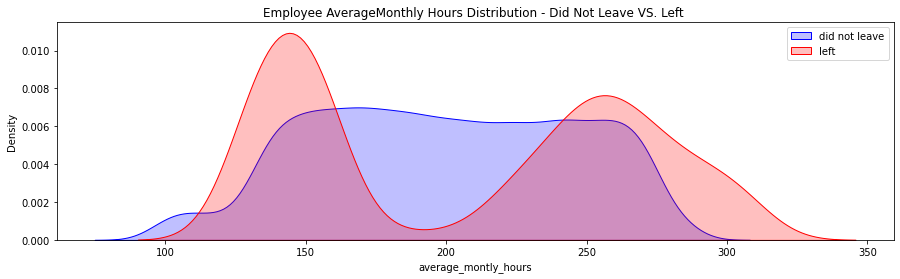

In [11]:
fig = plt.figure(figsize = (15, 4),)
ax = sns.kdeplot(df.loc[(df['left'] == 0), 'average_montly_hours'], color = 'b', shade =True, label = 'did not leave')
ax = sns.kdeplot(df.loc[(df['left'] == 1), 'average_montly_hours'], color = 'r', shade =True, label = 'left' )
plt.title('Employee AverageMonthly Hours Distribution - Did Not Leave VS. Left ')
plt.legend()
plt.show()

Employees who had less hours of work ( ~150 hours or less) left the company more. Employees who had too many hours of work ( roughly 250 or more) left the company. Employees who left generally were underworked or overworked.

### Leaving the company V.S. Satisfaction

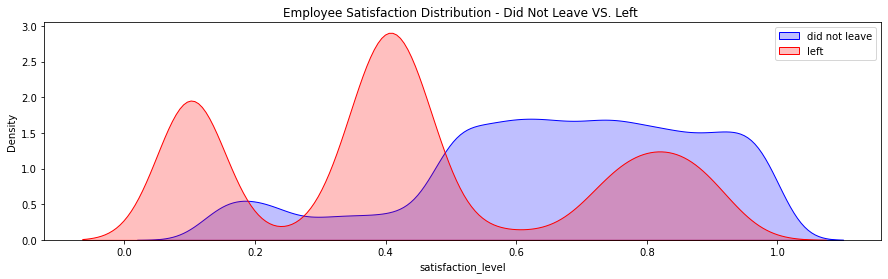

In [12]:
fig = plt.figure(figsize = (15, 4),)
ax = sns.kdeplot(df.loc[(df['left'] == 0), 'satisfaction_level'], color = 'b', shade =True, label = 'did not leave')
ax = sns.kdeplot(df.loc[(df['left'] == 1), 'satisfaction_level'], color = 'r', shade =True, label = 'left' )
plt.title('Employee Satisfaction Distribution - Did Not Leave VS. Left ')
plt.legend()
plt.show()

Employees who had really low satisfaction levels (0.2 or less) left the company more. Employees who had low satisfaction levels (0.3~0.5) left the company more. Employees who had really high satisfaction levels (0.7 or more) left the company more.

### Using one hot encoding for converting alphabetic values of salary column to numerical values 

In [13]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [14]:
salary_dummies = pd.get_dummies(subdf.salary, prefix = "salary")
df_with_dummies = pd.concat([subdf, salary_dummies], axis = 'columns')

In [15]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [16]:
df_with_dummies.drop('salary', axis = 'columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [17]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


### Implementing a Logistic Regression model :
#### ( in case we need to predict if an employee will stay at their job)

In [18]:
y = df.left

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.3)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
model.score(X_test, y_test)

0.7739047619047619